[View in Colaboratory](https://colab.research.google.com/github/Wayne-Wonbong-Jang/Topics-ML/blob/master/Keras_Fully_Connected_MNIST.ipynb)

# Implement Fully Connected Layer using Keras

* MNIST classification using fully connected layer is the basic example of Keras.
* Personally, I realized the importance of pre-processing by writing this code. (I've spent one hour to debug this model and found out that there was an error on my pre-processing : Garbage-In, Garbage-Out?)

In [0]:
import tensorflow as tf
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import sgd, adam
import matplotlib.pyplot as plt

In [203]:
#To see how the GPU works
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13110324125221337708
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11287966516
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16192503376963234596
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [202]:
# Enable GPU
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
batch_size = 64
num_classes=10
epochs = 20

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [164]:
x_train.shape

(60000, 28, 28)

In [0]:
def preprocess(dataset):
  dataset2 = dataset.reshape(-1,784)
  dataset2 = dataset2.astype('float32')
  dataset2 /= 255
  return dataset2

In [0]:
x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [167]:
x_train.shape

(60000, 784)

In [168]:
y_train.shape

(60000,)

In [0]:
y_train = keras.utils.to_categorical(y_train, K)
y_test = keras.utils.to_categorical(y_test, K)

In [170]:
y_train.shape

(60000, 10)

In [171]:
y_test.shape

(10000, 10)

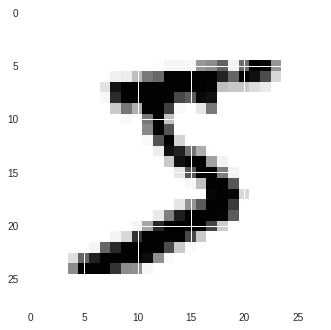

In [172]:
plt.imshow(x_train[0].reshape(-1,28))
plt.show()

In [173]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
sgd = optimizers.SGD(lr=0.01, clipvalue=0.05)

In [0]:
model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [176]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_54 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [178]:
history = model.fit(x_train, y_train, batch_size = batch_size, nb_epoch = epochs, verbose=1, validation_data = (x_test, y_test))

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 101us/step - loss: 1.2027 - acc: 0.6256 - val_loss: 0.4934 - val_acc: 0.8670
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.5884 - acc: 0.8222 - val_loss: 0.3575 - val_acc: 0.9003
Epoch 3/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.4708 - acc: 0.8593 - val_loss: 0.3018 - val_acc: 0.9162
Epoch 4/20
11328/60000 [====>.........................] - ETA: 4s - loss: 0.4228 - acc: 0.8765

60000/60000 [==============================] - 6s 94us/step - loss: 0.4107 - acc: 0.8804 - val_loss: 0.2700 - val_acc: 0.9223
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.3752 - acc: 0.8913 - val_loss: 0.2468 - val_acc: 0.9295
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.3437 - acc: 0.8992 - val_loss: 0.2297 - val_acc: 0.9327
Epoch 7/20
40512/60000 [===================>..........] - ETA: 1s - loss: 0.3259 - acc: 0.9055

60000/60000 [==============================] - 6s 94us/step - loss: 0.3257 - acc: 0.9042 - val_loss: 0.2159 - val_acc: 0.9370
Epoch 8/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.3026 - acc: 0.9114 - val_loss: 0.2014 - val_acc: 0.9406
Epoch 9/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2885 - acc: 0.9158 - val_loss: 0.1905 - val_acc: 0.9431
Epoch 10/20
44672/60000 [=====================>........] - ETA: 1s - loss: 0.2780 - acc: 0.9180

60000/60000 [==============================] - 6s 94us/step - loss: 0.2768 - acc: 0.9185 - val_loss: 0.1825 - val_acc: 0.9450
Epoch 11/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.2637 - acc: 0.9230 - val_loss: 0.1751 - val_acc: 0.9468
Epoch 12/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2520 - acc: 0.9267 - val_loss: 0.1657 - val_acc: 0.9497
Epoch 13/20
44480/60000 [=====================>........] - ETA: 1s - loss: 0.2415 - acc: 0.9289

60000/60000 [==============================] - 6s 95us/step - loss: 0.2410 - acc: 0.9292 - val_loss: 0.1595 - val_acc: 0.9512
Epoch 14/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2359 - acc: 0.9310 - val_loss: 0.1553 - val_acc: 0.9523
Epoch 15/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.2330 - acc: 0.9321 - val_loss: 0.1493 - val_acc: 0.9547
Epoch 16/20
44672/60000 [=====================>........] - ETA: 1s - loss: 0.2218 - acc: 0.9351

60000/60000 [==============================] - 6s 95us/step - loss: 0.2237 - acc: 0.9348 - val_loss: 0.1466 - val_acc: 0.9547
Epoch 17/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.2165 - acc: 0.9357 - val_loss: 0.1417 - val_acc: 0.9571
Epoch 18/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.2120 - acc: 0.9377 - val_loss: 0.1372 - val_acc: 0.9593
Epoch 19/20
40320/60000 [===================>..........] - ETA: 1s - loss: 0.2072 - acc: 0.9400

60000/60000 [==============================] - 6s 97us/step - loss: 0.2053 - acc: 0.9403 - val_loss: 0.1359 - val_acc: 0.9593
Epoch 20/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2024 - acc: 0.9403 - val_loss: 0.1315 - val_acc: 0.9607


In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

In [182]:
score[0] #loss

0.13153666500411929

In [183]:
score[1] #accuracy

0.9607

In [0]:
model2 = Sequential()
model2.add(Dense(128, activation='relu',input_shape=(784,)))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

In [198]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_60 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [201]:
history2 = model2.fit(x_train, y_train, batch_size = batch_size, nb_epoch = epochs, verbose=1, validation_data = (x_test, y_test))

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.4231 - acc: 0.8720 - val_loss: 0.1644 - val_acc: 0.9501
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.2265 - acc: 0.9318 - val_loss: 0.1283 - val_acc: 0.9605
Epoch 3/20
55616/60000 [==========================>...] - ETA: 0s - loss: 0.1871 - acc: 0.9442

60000/60000 [==============================] - 7s 112us/step - loss: 0.1867 - acc: 0.9440 - val_loss: 0.1068 - val_acc: 0.9672
Epoch 4/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.1701 - acc: 0.9478 - val_loss: 0.1005 - val_acc: 0.9705
Epoch 5/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1525 - acc: 0.9525 - val_loss: 0.0906 - val_acc: 0.9720
Epoch 6/20
27264/60000 [============>.................] - ETA: 3s - loss: 0.1381 - acc: 0.9563

60000/60000 [==============================] - 7s 113us/step - loss: 0.1410 - acc: 0.9560 - val_loss: 0.0913 - val_acc: 0.9726
Epoch 7/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.1325 - acc: 0.9587 - val_loss: 0.0862 - val_acc: 0.9733
Epoch 8/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.1266 - acc: 0.9601 - val_loss: 0.0815 - val_acc: 0.9745
Epoch 9/20
22208/60000 [==========>...................] - ETA: 4s - loss: 0.1228 - acc: 0.9626

60000/60000 [==============================] - 7s 114us/step - loss: 0.1239 - acc: 0.9616 - val_loss: 0.0821 - val_acc: 0.9769
Epoch 10/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1181 - acc: 0.9626 - val_loss: 0.0822 - val_acc: 0.9755
Epoch 11/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1127 - acc: 0.9631 - val_loss: 0.0812 - val_acc: 0.9749
Epoch 12/20
21568/60000 [=========>....................] - ETA: 4s - loss: 0.1039 - acc: 0.9645

60000/60000 [==============================] - 7s 112us/step - loss: 0.1091 - acc: 0.9649 - val_loss: 0.0732 - val_acc: 0.9780
Epoch 13/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1029 - acc: 0.9671 - val_loss: 0.0783 - val_acc: 0.9747
Epoch 14/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1032 - acc: 0.9664 - val_loss: 0.0781 - val_acc: 0.9783
Epoch 15/20
21952/60000 [=========>....................] - ETA: 4s - loss: 0.1010 - acc: 0.9682

60000/60000 [==============================] - 7s 112us/step - loss: 0.1010 - acc: 0.9678 - val_loss: 0.0716 - val_acc: 0.9785
Epoch 16/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0960 - acc: 0.9690 - val_loss: 0.0781 - val_acc: 0.9771
Epoch 17/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0964 - acc: 0.9691 - val_loss: 0.0728 - val_acc: 0.9783
Epoch 18/20
20608/60000 [=========>....................] - ETA: 4s - loss: 0.0879 - acc: 0.9707

60000/60000 [==============================] - 7s 115us/step - loss: 0.0903 - acc: 0.9698 - val_loss: 0.0754 - val_acc: 0.9777
Epoch 19/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0907 - acc: 0.9709 - val_loss: 0.0709 - val_acc: 0.9803
Epoch 20/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0887 - acc: 0.9711 - val_loss: 0.0763 - val_acc: 0.9778


In [0]:
score2 = model2.evaluate(x_test, y_test, verbose=0)

In [205]:
score2, score

([0.07631923551031505, 0.9778], [0.13153666500411929, 0.9607])

* We can see that Adam Optimizer works nicely with this example.
* Increasing the number of neurons in the first hidden layer will lower the cost further.

###Reference

1. https://keras.io/ <br/>
2. https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py